In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("D:\Data analysis\Loan Prediction Dataset.csv")

In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Data cleaning
1- filling the null values 
2-removing the outlier

In [8]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mean())
df['ApplicantIncome'] = df['ApplicantIncome'].fillna(df['ApplicantIncome'].mean())

df['CoapplicantIncome'] = df['CoapplicantIncome'].fillna(df['CoapplicantIncome'].mean())


In [9]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [10]:
df['total_income']= df['ApplicantIncome']+df['CoapplicantIncome']

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
total_income         0
dtype: int64

In [ ]:
df[df.duplicated()].index

Int64Index([], dtype='int64')

c:\Users\sshev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

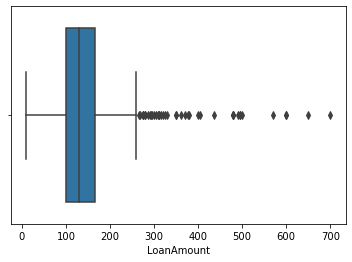

In [13]:
sns.boxplot(df['LoanAmount'])

In [14]:
df.shape

(614, 14)

In [15]:
df['LoanAmount'].mean()

146.41216216216213

In [16]:
df = df[df['LoanAmount']<200]
df = df[df['LoanAmount']>50]

c:\Users\sshev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LoanAmount'>

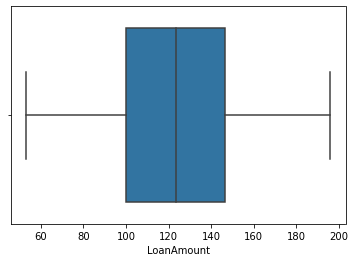

In [17]:
sns.boxplot(df['LoanAmount'])

In [18]:
df.shape

(506, 14)

Data visualization 
****for categorical and numerical data

c:\Users\sshev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

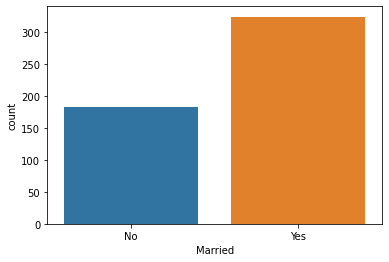

In [19]:
sns.countplot(df['Married'])

c:\Users\sshev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

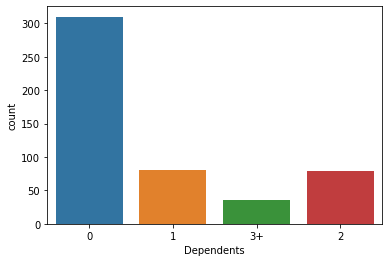

In [20]:
sns.countplot(df['Dependents'])

c:\Users\sshev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

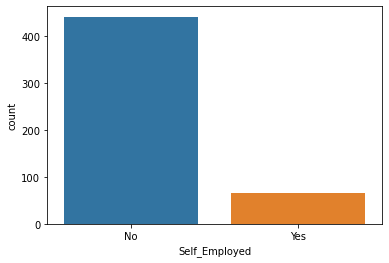

In [21]:
sns.countplot(df['Self_Employed'])

c:\Users\sshev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

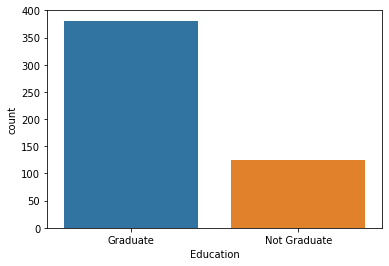

In [22]:
sns.countplot(df['Education'])

c:\Users\sshev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

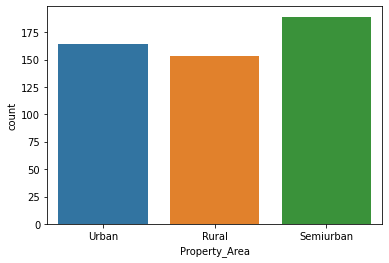

In [23]:
sns.countplot(df['Property_Area'])

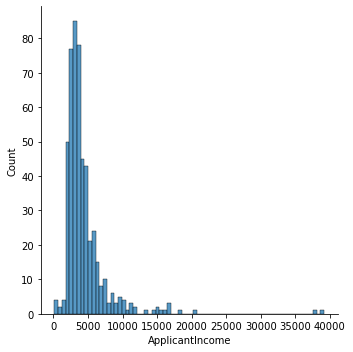

In [24]:
sns.displot(df["ApplicantIncome"])

In [25]:
#log transformation

In [26]:
df["ApplicantIncomelog"] = np.log(df["ApplicantIncome"])

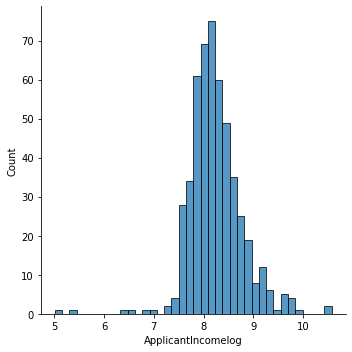

In [27]:
sns.displot(df["ApplicantIncomelog"] )

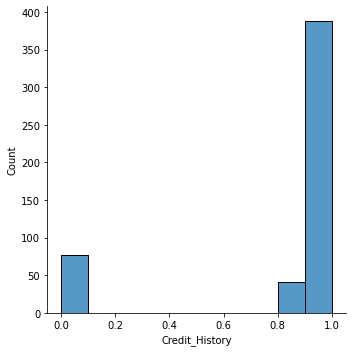

In [28]:
sns.displot(df["Credit_History"])

In [29]:
df["Credit_Historylog"]= np.log(df["Credit_History"])

c:\Users\sshev\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


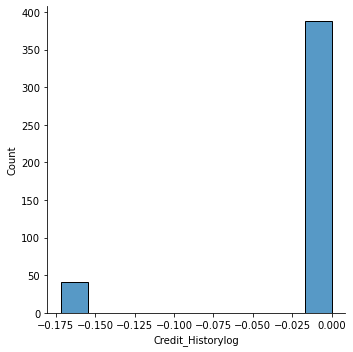

In [30]:
sns.displot(df["Credit_Historylog"])

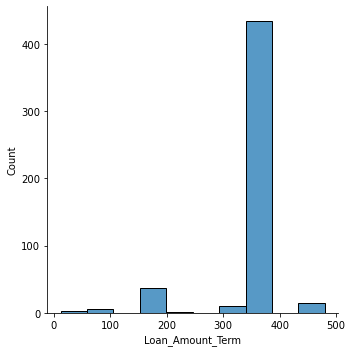

In [31]:
sns.displot(df["Loan_Amount_Term"])

In [32]:
df["Loan_Amount_Termlog"]= np.log(df["Loan_Amount_Term"])

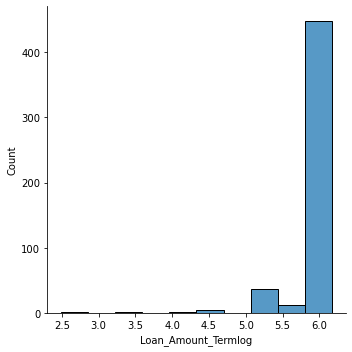

In [33]:
sns.displot(df["Loan_Amount_Termlog"])

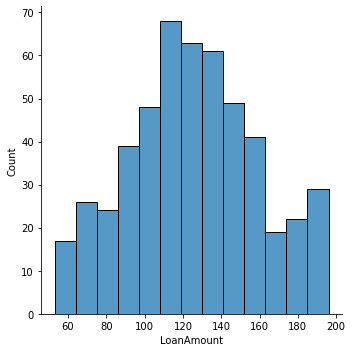

In [34]:
sns.displot(df["LoanAmount"])

In [35]:
df["LoanAmountlog"] = np.log(df["LoanAmount"])

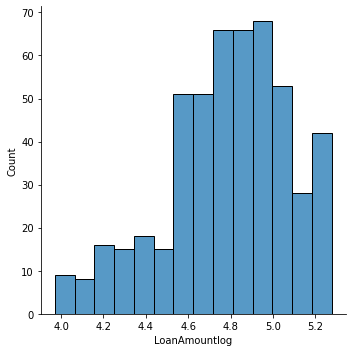

In [36]:
sns.displot(df["LoanAmountlog"])

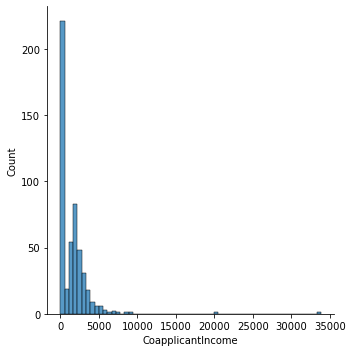

In [37]:
sns.displot(df["CoapplicantIncome"])

In [38]:
df["CoapplicantIncomelog"] = np.log(df["CoapplicantIncome"] )

c:\Users\sshev\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


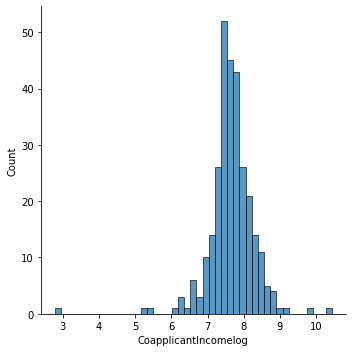

In [39]:
sns.displot(df["CoapplicantIncomelog"])

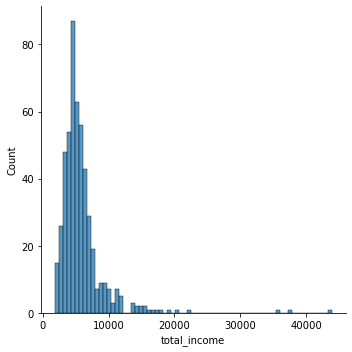

In [40]:
sns.displot(df["total_income"])

In [41]:
df["total_income_log"]=np.log(df["total_income"])

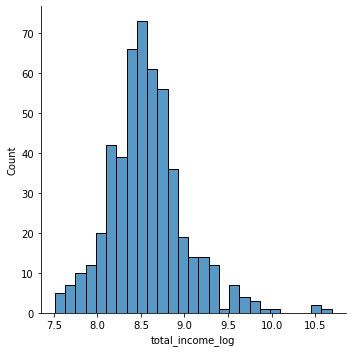

In [42]:
sns.displot(df["total_income_log"])

In [43]:
temp = df.corr()

In [44]:
temp

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,total_income,ApplicantIncomelog,Credit_Historylog,Loan_Amount_Termlog,LoanAmountlog,CoapplicantIncomelog,total_income_log
ApplicantIncome,1.000000,-0.142183,0.238211,-0.052176,0.049104,0.808152,0.835851,0.045862,-0.032663,0.220084,0.051310,0.705608
CoapplicantIncome,-0.142183,1.000000,0.142120,-0.031082,0.008618,0.468085,-0.227615,-0.011319,-0.023519,0.140928,0.694614,0.432026
LoanAmount,0.238211,0.142120,1.000000,-0.014744,0.010054,0.297228,0.317597,0.019234,-0.007227,0.984601,0.220065,0.483553
Loan_Amount_Term,-0.052176,-0.031082,-0.014744,1.000000,-0.004546,-0.065075,-0.094238,0.024917,0.933663,-0.007413,-0.078207,-0.106412
Credit_History,0.049104,0.008618,0.010054,-0.004546,1.000000,0.048966,0.030110,1.000000,-0.014127,0.003353,-0.054323,0.046336
total_income,0.808152,0.468085,0.297228,-0.065075,0.048966,1.000000,0.610774,0.034250,-0.043154,0.280336,0.494705,0.886998
ApplicantIncomelog,0.835851,-0.227615,0.317597,-0.094238,0.030110,0.610774,1.000000,0.027134,-0.071131,0.297750,-0.020838,0.685333
Credit_Historylog,0.045862,-0.011319,0.019234,0.024917,1.000000,0.034250,0.027134,1.000000,0.052916,0.027794,-0.039067,0.028879
Loan_Amount_Termlog,-0.032663,-0.023519,-0.007227,0.933663,-0.014127,-0.043154,-0.071131,0.052916,1.000000,-0.004152,-0.062015,-0.076884
LoanAmountlog,0.220084,0.140928,0.984601,-0.007413,0.003353,0.280336,0.297750,0.027794,-0.004152,1.000000,0.206265,0.469792


<AxesSubplot:>

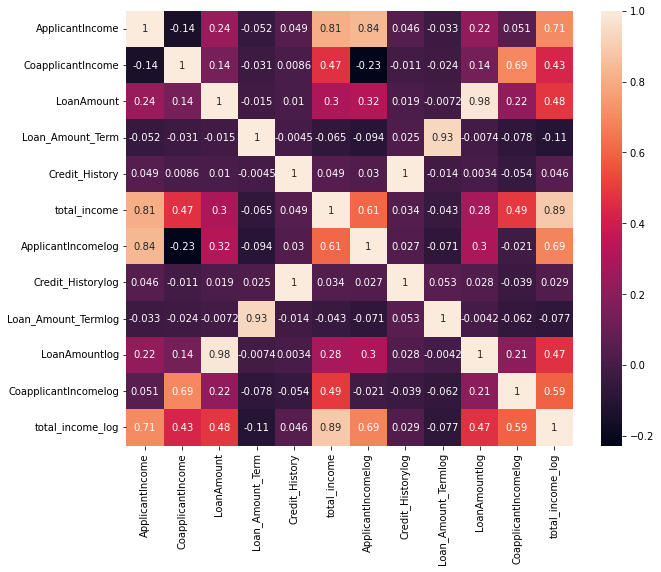

In [45]:
plt.figure(figsize = (10,8))
sns.heatmap(temp,annot=True)

In [46]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [47]:
corr_feature=correlation(df,0.5)

In [48]:
corr_feature

{'ApplicantIncomelog',
 'CoapplicantIncomelog',
 'Credit_Historylog',
 'LoanAmountlog',
 'Loan_Amount_Termlog',
 'total_income',
 'total_income_log'}

In [49]:
col ={'ApplicantIncome','CoapplicantIncome','Credit_Historylog','LoanAmount','Loan_Amount_Term','Loan_ID','total_income','CoapplicantIncomelog'}

In [50]:
df = df.drop(columns=col, axis=1)

In [51]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
columns ={'Gender','Married','Dependents','Education','Self_Employed','Loan_Status','Property_Area'}
for col in columns:
    df[col]= le.fit_transform(df[col])

In [52]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,Loan_Amount_Termlog,LoanAmountlog,total_income_log
0,1,0,0,0,0,1.0,2,1,8.674026,5.886104,4.986426,8.674026
1,1,1,1,0,0,1.0,0,0,8.430109,5.886104,4.852030,8.714568
2,1,1,0,0,1,1.0,2,1,8.006368,5.886104,4.189655,8.006368
3,1,1,0,1,0,1.0,2,1,7.856707,5.886104,4.787492,8.505323
4,1,0,0,0,0,1.0,2,1,8.699515,5.886104,4.948760,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,2,1,0,1.0,0,1,8.290794,5.886104,5.056246,8.593784
608,1,1,0,0,0,1.0,0,1,8.080856,5.886104,4.682131,8.552946
609,0,0,0,0,0,1.0,0,1,7.972466,5.886104,4.262680,7.972466
612,1,1,2,0,0,1.0,2,1,8.933664,5.886104,5.231109,8.933664


Spliting the data into training and testing 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:

X=df[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','ApplicantIncomelog','Credit_History','Loan_Amount_Termlog','LoanAmountlog','total_income_log']]

y=df['Loan_Status']

In [55]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

In [56]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncomelog,Credit_History,Loan_Amount_Termlog,LoanAmountlog,total_income_log
420,1,1,0,0,0,0,8.670601,1.000000,5.886104,4.927254,8.670601
508,1,1,0,0,1,2,7.815611,1.000000,5.886104,5.236442,8.611048
53,1,1,2,0,0,2,8.437284,1.000000,5.886104,4.897840,8.437284
241,1,1,1,1,0,2,7.828038,1.000000,5.192957,4.941642,8.410276
519,0,0,0,1,0,0,8.131531,1.000000,5.886104,4.553877,8.131531
...,...,...,...,...,...,...,...,...,...,...,...
607,1,1,2,1,0,0,8.290794,1.000000,5.886104,5.056246,8.593784
518,1,0,0,0,0,1,8.451694,1.000000,5.886104,5.220356,8.794522
418,1,1,0,0,0,0,6.932448,1.000000,5.886104,4.718499,8.242230
392,1,1,0,0,0,2,7.856707,0.842199,5.886104,4.787492,8.454892


In [57]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncomelog,Credit_History,Loan_Amount_Termlog,LoanAmountlog,total_income_log
239,1,1,1,0,0,1,8.106213,1.000000,5.886104,4.564348,8.106213
93,1,0,0,0,0,1,8.326759,1.000000,5.886104,4.804021,8.326759
188,1,1,0,0,1,0,6.513230,1.000000,5.886104,5.123964,8.694502
131,1,0,0,0,0,2,7.607878,1.000000,5.886104,4.304065,8.279697
129,1,1,0,0,0,0,8.712760,0.842199,5.886104,5.204007,9.065199
...,...,...,...,...,...,...,...,...,...,...,...
543,1,1,1,1,0,2,7.713785,1.000000,5.886104,4.852030,8.468633
430,0,0,1,0,1,1,9.062304,1.000000,5.886104,5.010635,9.062304
167,1,1,0,0,0,0,7.799343,1.000000,5.886104,4.859812,8.660774
474,1,0,2,0,0,0,8.618305,1.000000,5.886104,5.087596,9.228180


In [58]:
y_train

420    1
508    1
53     0
241    0
519    0
      ..
607    1
518    0
418    1
392    1
29     1
Name: Loan_Status, Length: 404, dtype: int32

In [59]:
y_test

239    1
93     1
188    1
131    1
129    0
      ..
543    1
430    1
167    1
474    1
376    1
Name: Loan_Status, Length: 102, dtype: int32

Build a model using logestic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logestic_regression_model = LogisticRegression()
logestic_regression_model.fit(X_train,y_train)
logestic_regression_model.score(X_train,y_train)*100


81.1881188118812

In [61]:
ypred = logestic_regression_model.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(ypred,y_test)

0.8529411764705882

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
scores = cross_val_score(logestic_regression_model,X_train,y_train,cv=10)

c:\Users\sshev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\sshev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [65]:
scores

array([0.73170732, 0.80487805, 0.90243902, 0.80487805, 0.825     ,
       0.8       , 0.725     , 0.925     , 0.775     , 0.8       ])

In [66]:
np.mean(scores)

0.8093902439024392

In [67]:
from sklearn.model_selection import cross_val_predict

In [68]:
predict = cross_val_predict(logestic_regression_model,X_test,y_test)

c:\Users\sshev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [69]:
predict

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [70]:
scores_test = cross_val_score(logestic_regression_model,X_test,y_test,cv=10)

c:\Users\sshev\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
scores_test

array([0.81818182, 0.81818182, 0.8       , 0.7       , 0.6       ,
       0.9       , 0.9       , 1.        , 0.9       , 0.9       ])

In [72]:
np.mean(scores_test)

0.8336363636363637

Using Random forest 

In [85]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=800)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=800)

In [86]:
model.score(X_test, y_test)

0.8627450980392157

In [87]:
y_predicted = model.predict(X_test)

In [88]:
y_predicted

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [89]:
accuracy_score(ypred,y_test)

0.8529411764705882